In [68]:
# Dependencies and Setup

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

customer_data_to_load = Path("customer_segmentation_data.csv")

cs_df = pd.read_csv(customer_data_to_load)
customer_segmentation = pd.read_csv(customer_data_to_load)

cs_df.head()
# customer_segmentation.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


# Data Cleaning

In [27]:
# Calculate # of unique customers

number_customer = cs_df['Customer ID'].nunique()
number_customer

40259

In [28]:
# Add a column "Customer Number" in the csv file
# Every row is considered as a different customer, even having the same customer ID

counter = 0

for index, row in cs_df.iterrows():
    if pd.notna(row['Customer ID']):
        counter += 1
    cs_df.at[index, 'Customer Number'] = counter

cs_df.insert(1, 'Customer Number', cs_df.pop('Customer Number'))

# resources_folder = Path("Resources")

cs_df.to_csv("modified_customer_segmentation.csv", index=False)

cs_df.head()

,Customer ID,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,2.0,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [71]:
# Add a column "Customer Number" in the csv file
# Every row is considered as a different customer, even having the same customer ID

counter = 0

for index, row in cs_df.iterrows():
    if pd.notna(row['Customer ID']):
        counter += 1
    customer_segmentation.at[index, 'Customer Number'] = counter

customer_segmentation.insert(1, 'Customer Number', customer_segmentation.pop('Customer Number'))

# resources_folder = Path("Resources")

customer_segmentation.to_csv("modified_customer_segmentation.csv", index=False)

customer_segmentation.head()

,Customer ID,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,2.0,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


# Relationship Comparison: Insurace Coverage vs. Income Level

In [29]:
print(cs_df.columns)

Index(['Customer ID', 'Customer Number', 'Age', 'Gender', 'Marital Status',
       'Education Level', 'Geographic Information', 'Occupation',
       'Income Level', 'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')


In [30]:
cs_df.drop(columns=['Customer ID'], inplace=True)

In [31]:
correlation = cs_df['Coverage Amount'].corr(cs_df['Income Level'])
print(f"The correlation between Insurance Coverage and Income Level is: {correlation}")

The correlation between Insurance Coverage and Income Level is: -0.01802429895116385


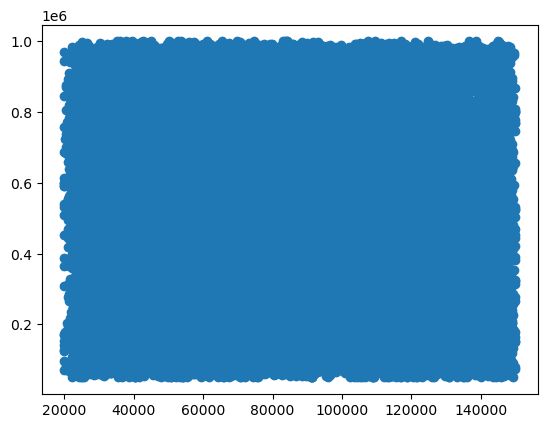

In [32]:
scatter_plot = plt.scatter(cs_df['Income Level'], cs_df['Coverage Amount'])
scatter_plot

In [35]:
income_bins = [20000, 51000, 80000, 116000, 150000]
labels = ["$20000-51000", "$51000-80000", "$80000-116000","$116000-150000"]

In [34]:
cs_df['Income Level']=pd.cut(cs_df['Income Level'],bins=income_bins,labels=labels,include_lowest=True)
cs_df

,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,$51000-80000,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,2.0,26,Male,Widowed,Doctorate,Goa,Manager,$51000-80000,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,$51000-80000,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,$51000-80000,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,$20000-51000,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,53499.0,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,$116000-150000,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,53500.0,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,$116000-150000,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,53501.0,25,Male,Divorced,Doctorate,Assam,Teacher,$20000-51000,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,53502.0,42,Male,Married,Doctorate,Andhra Pradesh,Artist,$51000-80000,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [36]:
coverage_bins = [200000, 480000, 740000, 1000000]
labels2 = ["$200000-480000", "$480000-7400000", "$7400000-1000000"]

In [37]:
cs_df['Coverage Amount']=pd.cut(cs_df['Coverage Amount'],bins=coverage_bins,labels=labels2,include_lowest=True)
cs_df

,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,$51000-80000,policy5,04-10-2018,Phone,policy2,$200000-480000,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,2.0,26,Male,Widowed,Doctorate,Goa,Manager,$51000-80000,policy5,11-06-2018,Chat,policy1,$7400000-1000000,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,$51000-80000,policy5,06-05-2021,Email,policy3,$7400000-1000000,4413,Group,Email,Mail,Evening,German,Segment3
3,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,$51000-80000,policy5,09-02-2018,Chat,policy2,$7400000-1000000,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,$20000-51000,policy1,09-10-2018,Chat,policy4,$200000-480000,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,53499.0,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,$116000-150000,policy3,01-01-2019,Mobile App,policy1,$480000-7400000,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,53500.0,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,$116000-150000,policy5,5/18/2021,Mobile App,policy4,$480000-7400000,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,53501.0,25,Male,Divorced,Doctorate,Assam,Teacher,$20000-51000,policy2,11/27/2018,In-Person,policy1,$480000-7400000,4407,Individual,Text,Text,Weekends,French,Segment4
53501,53502.0,42,Male,Married,Doctorate,Andhra Pradesh,Artist,$51000-80000,policy4,06-04-2021,In-Person,policy1,$480000-7400000,4482,Business,Mail,Phone,Morning,French,Segment5


In [38]:
income_by_education = cs_df.groupby(["Education Level", "Income Level"]).size().reset_index(name='Totals')
income_by_education

,Education Level,Income Level,Totals
0,Associate Degree,$20000-51000,2900
1,Associate Degree,$51000-80000,3108
2,Associate Degree,$80000-116000,3105
3,Associate Degree,$116000-150000,3100
4,Bachelor's Degree,$20000-51000,2353
5,Bachelor's Degree,$51000-80000,2342
6,Bachelor's Degree,$80000-116000,2170
7,Bachelor's Degree,$116000-150000,2349
8,Doctorate,$20000-51000,3031
9,Doctorate,$51000-80000,3147


In [39]:
income_by_coverage = cs_df.groupby(["Coverage Amount", "Income Level"]).size().reset_index(name='Totals')
income_by_coverage

,Coverage Amount,Income Level,Totals
0,$200000-480000,$20000-51000,3956
1,$200000-480000,$51000-80000,4111
2,$200000-480000,$80000-116000,4121
3,$200000-480000,$116000-150000,4202
4,$480000-7400000,$20000-51000,3377
5,$480000-7400000,$51000-80000,3305
6,$480000-7400000,$80000-116000,3368
7,$480000-7400000,$116000-150000,3240
8,$7400000-1000000,$20000-51000,3225
9,$7400000-1000000,$51000-80000,3540


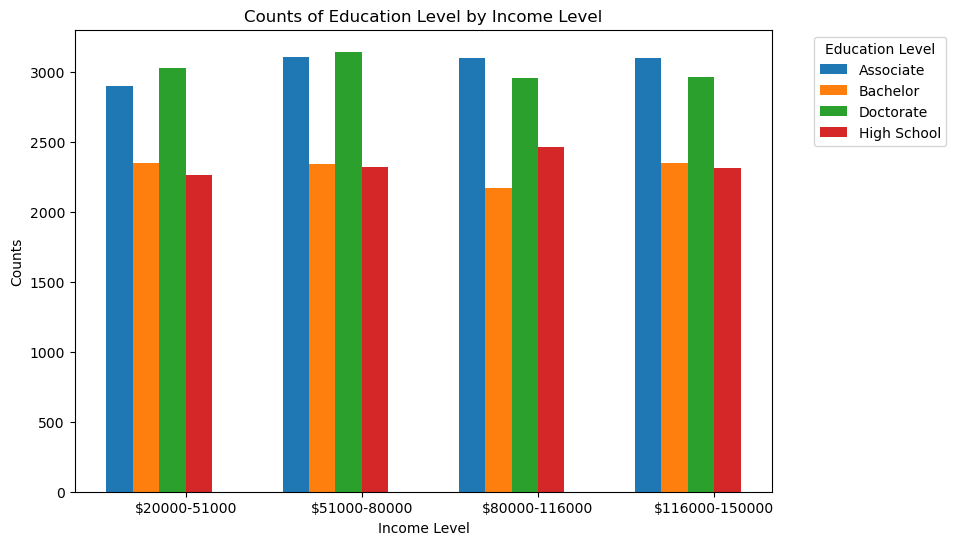

In [40]:
education = ["Associate", "Bachelor", "Doctorate", "High School", "Master"]
income_bin = ["$20000-51000", "$51000-80000", "$80000-116000", "$116000-150000"]
counts = [
    [2900, 3108, 3105, 3100],
    [2353,2342,2170,2349],
    [3031,3147, 2961, 2964],
    [2263,2326,2464, 2313]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (educate, data2) in enumerate(zip(education, counts)):
    x = range(len(data2))
    ax.bar([pos + i * bar_width for pos in x], data2, width=bar_width, label=educate)

ax.set_xticks([pos + bar_width * 2.5 for pos in range(len(income_bin))])
ax.set_xticklabels(income_bin)
ax.set_xlabel('Income Level')
ax.set_ylabel('Counts')
ax.set_title('Counts of Education Level by Income Level')
ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

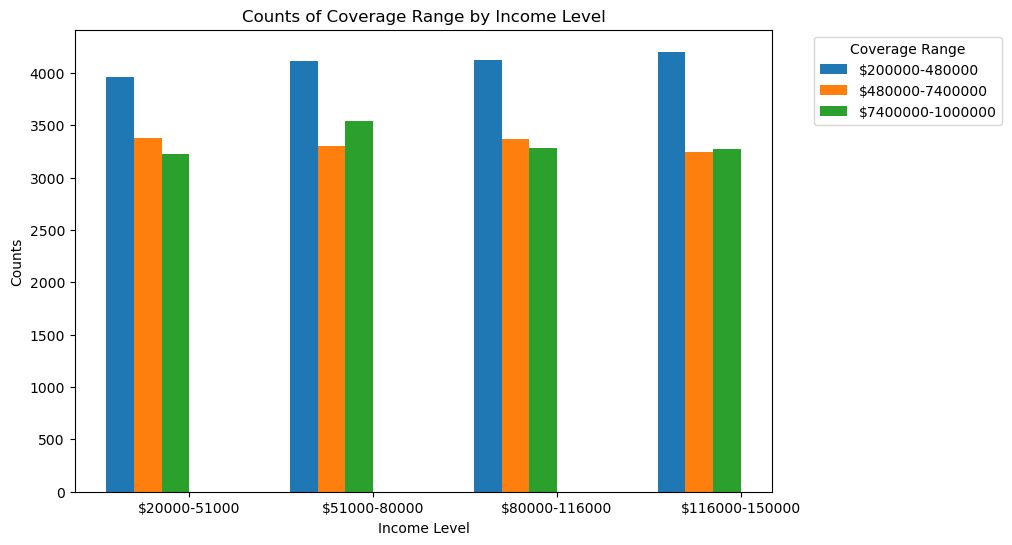

In [41]:
coverage = ["$200000-480000", "$480000-7400000", "$7400000-1000000"]
income_bin = ["$20000-51000", "$51000-80000", "$80000-116000", "$116000-150000"]
counts = [
    [3956, 4111,4121,4202],
    [3377,3305,3368,3240],
    [3225,3540,3287,3272]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (coverage, data2) in enumerate(zip(coverage, counts)):
    x = range(len(data2))
    ax.bar([pos + i * bar_width for pos in x], data2, width=bar_width, label=coverage)

ax.set_xticks([pos + bar_width * 2.5 for pos in range(len(income_bin))])
ax.set_xticklabels(income_bin)
ax.set_xlabel('Income Level')
ax.set_ylabel('Counts')
ax.set_title('Counts of Coverage Range by Income Level')
ax.legend(title='Coverage Range', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Relationship Comparison: Occupation vs Communication Channel

In [42]:
# Group data by "Occupation" & "Preferred Communication Channel"
communication_by_occupation = cs_df.groupby(["Occupation", "Preferred Communication Channel"]).size().unstack(fill_value=0)
communication_by_occupation

Preferred Communication Channel,Email,In-Person Meeting,Mail,Phone,Text
Occupation,,,,,
Artist,882,1411,1070,1488,815
Doctor,931,1638,1104,1152,748
Engineer,1063,1418,1187,1078,958
Entrepreneur,1233,1761,1235,1539,868
Lawyer,1010,1425,1184,1296,860
Manager,900,1743,1159,1126,875
Nurse,703,1190,880,1119,629
Salesperson,1108,2246,1474,1811,1280
Teacher,973,1479,1136,1263,1055


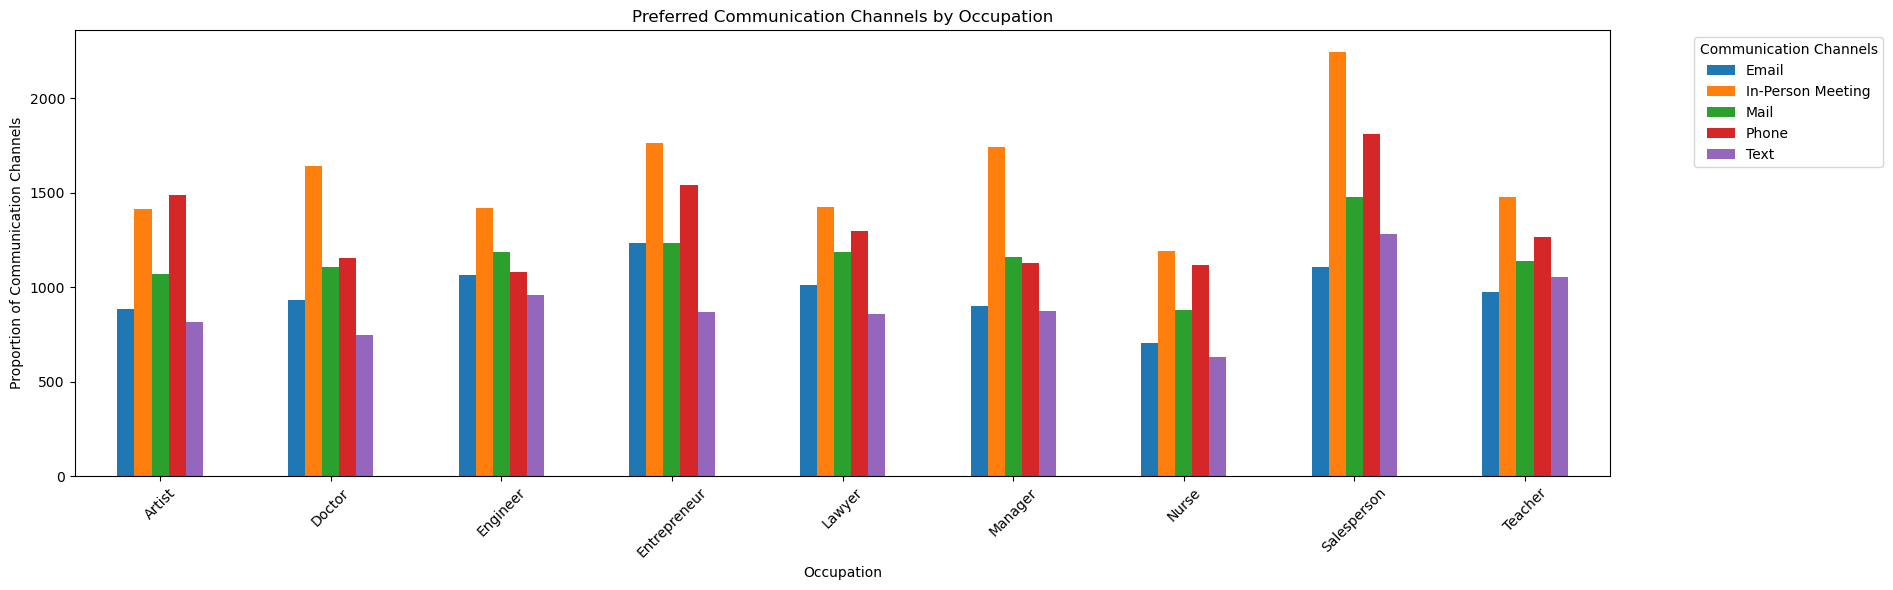

In [43]:
# Visualize relationship between "Occupation" & "Preferred Communication Channel"

fig, ax = plt.subplots(figsize=(19, 6))

communication_by_occupation.plot(kind='bar', ax=ax)
plt.title('Preferred Communication Channels by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Communication Channels')
plt.xticks(rotation=45)
plt.legend(title='Communication Channels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# Group data by "Occupation" & "Preferred Contact Time"

contact_time_by_occupation = cs_df.groupby(["Occupation", "Preferred Contact Time"]).size().unstack(fill_value=0)
contact_time_by_occupation

Preferred Contact Time,Afternoon,Anytime,Evening,Morning,Weekends
Occupation,,,,,
Artist,982,813,987,1510,1374
Doctor,901,749,1059,1343,1521
Engineer,1012,720,901,1495,1576
Entrepreneur,1193,930,1200,1692,1621
Lawyer,957,817,988,1484,1529
Manager,915,701,1033,1418,1736
Nurse,776,625,880,1192,1048
Salesperson,1355,982,1248,2058,2276
Teacher,1044,763,1112,1576,1411


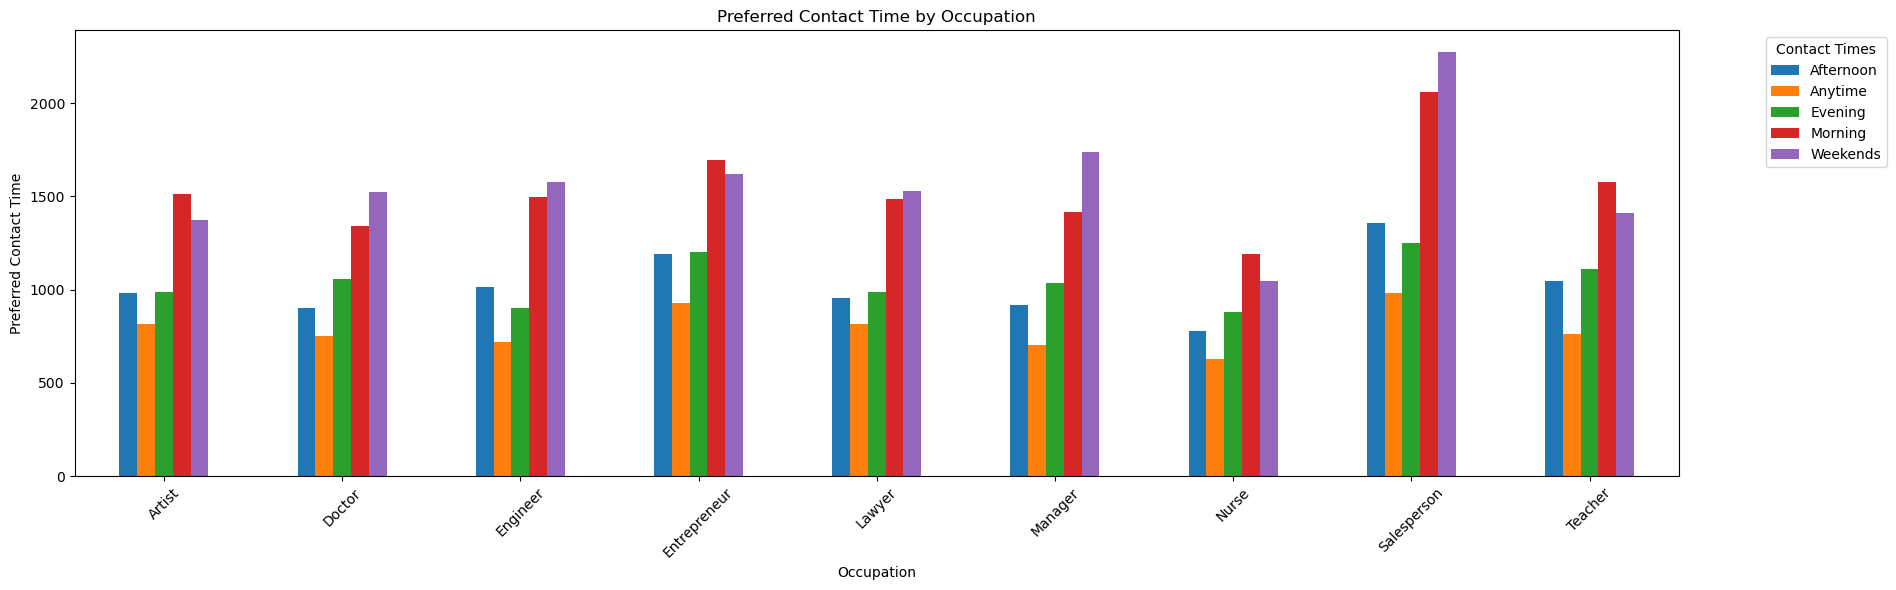

In [45]:
# Visualize relationship between "Occupation" & "Preferred Contact Time"

fig, ax = plt.subplots(figsize=(19, 6))

contact_time_by_occupation.plot(kind='bar', ax=ax)
plt.title('Preferred Contact Time by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Preferred Contact Time')
plt.xticks(rotation=45)
plt.legend(title='Contact Times', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Relationship Comparison: Premium Coverage Amount vs. Age

In [49]:
# Establish the Age bins
age_bins = [0, 25, 40, 55, 70]
bins_labels = ["<25", "25-40","40-55", "55-70"]
customer_segmentation_df_copy = cs_df.copy()
customer_segmentation_df_copy["Age Range"] = pd.cut (x = customer_segmentation_df_copy["Age"], bins = age_bins, labels = bins_labels, include_lowest=True)

familypolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Family', ['Age Range', 'Premium Amount']]
avg_premium_by_age_familypolicy = familypolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_familypolicy.name = "Avg_Premium_Family"

businesspolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Business', ['Age Range', 'Premium Amount']]
avg_premium_by_age_businesspolicy = businesspolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_businesspolicy.name = "Avg_Premium_Business"

grouppolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Group', ['Age Range', 'Premium Amount']]
avg_premium_by_age_grouppolicy = grouppolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_grouppolicy.name = "Avg_Premium_Group"

individualpolicy = customer_segmentation_df_copy.loc [customer_segmentation_df_copy['Policy Type'] == 'Individual', ['Age Range', 'Premium Amount']]
avg_premium_by_age_individualpolicy = individualpolicy.groupby (["Age Range"])["Premium Amount"].mean()
avg_premium_by_age_individualpolicy.name = "Avg_Premium_Individual"

avg_premium_by_age_df = pd.merge (avg_premium_by_age_familypolicy, avg_premium_by_age_businesspolicy, how = "left", on = ["Age Range"])
avg_premium_by_age_df = pd.merge (avg_premium_by_age_df, avg_premium_by_age_grouppolicy, how = "left", on = ["Age Range"])
avg_premium_by_age_df = pd.merge (avg_premium_by_age_df, avg_premium_by_age_individualpolicy, how = "left", on = ["Age Range"])

avg_premium_by_age_df

,Avg_Premium_Family,Avg_Premium_Business,Avg_Premium_Group,Avg_Premium_Individual
Age Range,,,,
<25,2985.098990,3031.422367,3032.702529,3027.172735
25-40,2967.640714,3042.021329,3069.066564,3021.361734
40-55,2939.774023,2987.931937,3015.364277,3025.240924
55-70,2973.495512,3080.780800,3054.264816,3084.010950


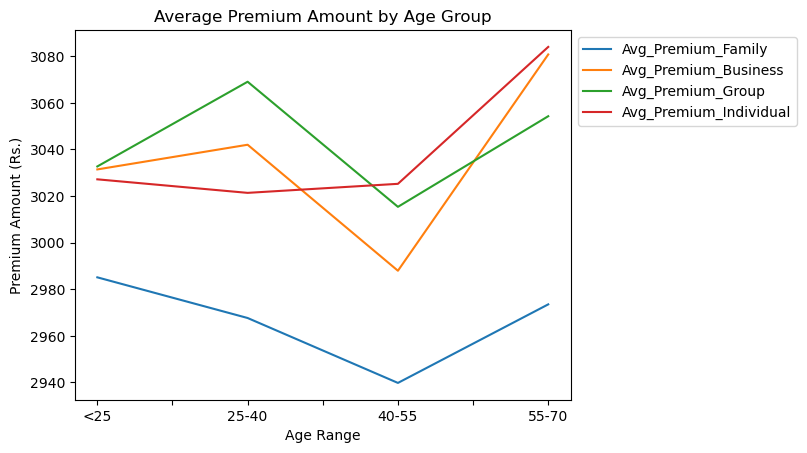

In [50]:
avg_premium_by_age_plot = avg_premium_by_age_df.plot.line ()
avg_premium_by_age_plot.set_ylabel ("Premium Amount (Rs.)")
avg_premium_by_age_plot.set_title ("Average Premium Amount by Age Group")
avg_premium_by_age_plot.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Relationship Comparison: Marital Status vs. Policy type

In [51]:
policy_by_marital = cs_df.groupby(["Marital Status", "Policy Type"]).size().reset_index(name='Totals')
policy_by_marital

,Marital Status,Policy Type,Totals
0,Divorced,Business,3352
1,Divorced,Family,2918
2,Divorced,Group,4651
3,Divorced,Individual,2230
4,Married,Business,3536
5,Married,Family,3071
6,Married,Group,4558
7,Married,Individual,2054
8,Separated,Business,2482
9,Separated,Family,2095


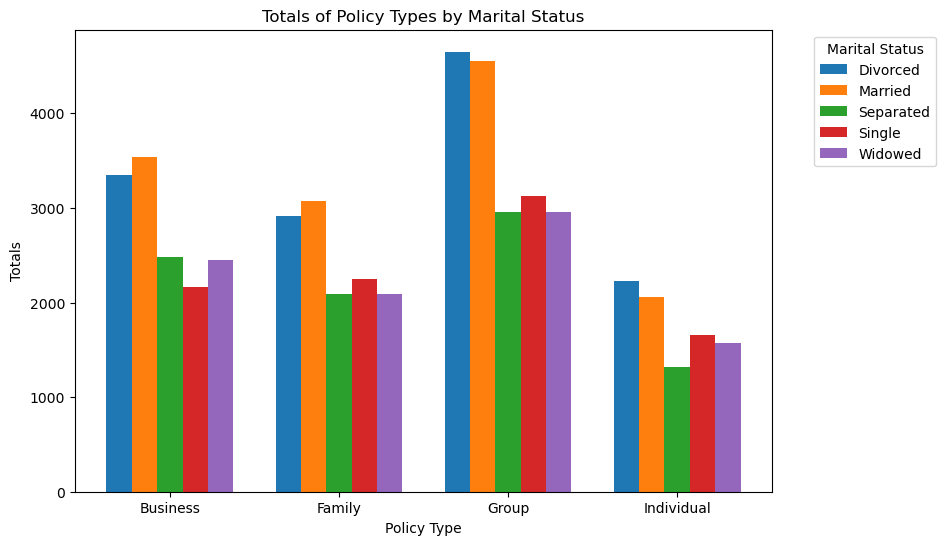

In [52]:
marital_status = ["Divorced", "Married", "Separated", "Single", "Widowed"]
policy_types = ["Business", "Family", "Group", "Individual"]
totals = [
    [3352, 2918, 4651, 2230],
    [3536, 3071, 4558, 2054],
    [2482, 2095, 2962, 1322],
    [2166, 2251, 3122, 1656],
    [2450, 2089, 2962, 1576]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (mstatus, data) in enumerate(zip(marital_status, totals)):
    x = range(len(data))
    ax.bar([pos + i * bar_width for pos in x], data, width=bar_width, label=mstatus)

ax.set_xticks([pos + bar_width * 2 for pos in range(len(policy_types))])
ax.set_xticklabels(policy_types)
ax.set_xlabel('Policy Type')
ax.set_ylabel('Totals')
ax.set_title('Totals of Policy Types by Marital Status')
ax.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [72]:
Customer_Num = customer_segmentation[['Customer Number', 'Age', 'Coverage Amount']]
Customer_Num.head()

,Customer Number,Age,Coverage Amount
0,1.0,23,366603
1,2.0,26,780236
2,3.0,29,773926
3,4.0,20,787815
4,5.0,25,366506


In [73]:
# Establish the bins
age_bracket = [0, 20, 40, 60, 80]
labels = ["<20", "20-40", "40-60", "60-80"]

In [74]:
import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings('ignore')

# Assuming age_bracket and labels are defined elsewhere
# Convert "Age" column to float dtype
Customer_Num["Age"] = Customer_Num["Age"].astype(float)

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
Customer_Num = Customer_Num.copy()

# Use .loc to set values on the copied DataFrame
Customer_Num.loc[:, "Coverage Range by Customer #"] = pd.cut(Customer_Num["Age"], bins=age_bracket, labels=labels, include_lowest=True)

Customer_Num.head()

,Customer Number,Age,Coverage Amount,Coverage Range by Customer #
0,1.0,23.0,366603,20-40
1,2.0,26.0,780236,20-40
2,3.0,29.0,773926,20-40
3,4.0,20.0,787815,<20
4,5.0,25.0,366506,20-40


In [75]:
# Convert "Coverage Amount" column to numeric dtype
Customer_Num["Coverage Amount"] = pd.to_numeric(Customer_Num["Coverage Amount"], errors='coerce')

# Group by "Coverage Range by Customer #" and calculate the mean of numeric values in "Coverage Amount" column
age_bracket_coverage = Customer_Num.groupby(["Coverage Range by Customer #"])["Coverage Amount"].mean()

# Create a DataFrame from the mean values
age_bracket_coverage_summary = pd.DataFrame({
    "Average Age Coverage Amount": age_bracket_coverage
})

# Display the summary DataFrame
age_bracket_coverage_summary

,Average Age Coverage Amount
Coverage Range by Customer #,
<20,493848.635833
20-40,490832.704803
40-60,492716.769343
60-80,495705.711871


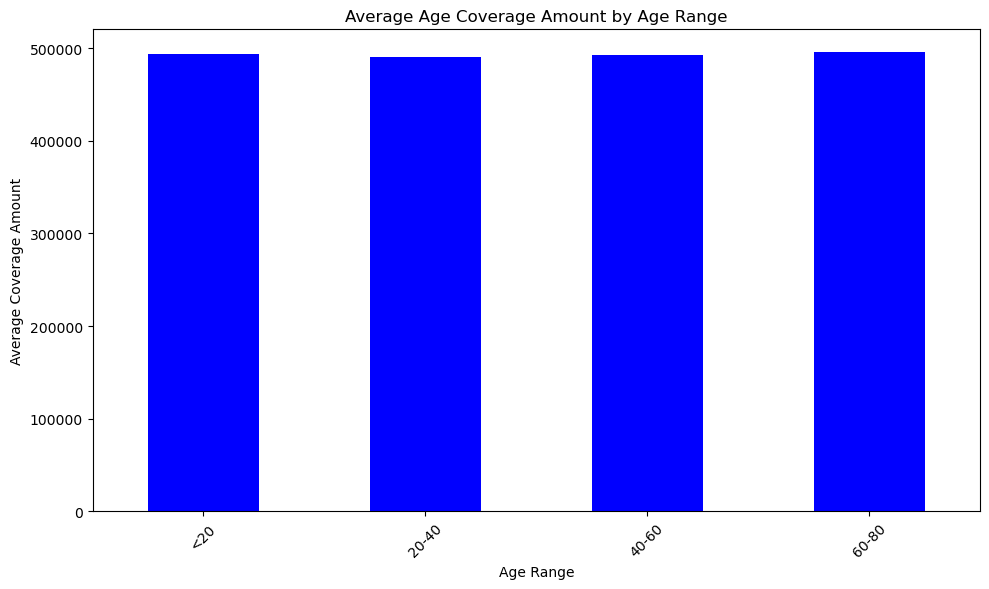

In [27]:
# Plotting the bar chart
age_bracket_coverage_summary.plot(kind='bar', color='blue', figsize=(10, 6), legend=False)

# Adding labels and title
plt.title('Average Age Coverage Amount by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Coverage Amount')

# Showing the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()